<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/f%20Sarima_arima_of_flow_14days_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [159]:
df=pd.read_csv('Flow.csv')
df.head()

,created_at,Flow
0,2022-03-27T15:07:07+00:00,2
1,2022-03-27T15:07:34+00:00,1
2,2022-03-27T15:07:53+00:00,1
3,2022-03-27T15:08:24+00:00,1
4,2022-03-27T15:08:40+00:00,2


In [160]:
df.tail()

,created_at,Flow
60164,2022-04-12T18:10:02+00:00,0
60165,2022-04-12T18:10:18+00:00,0
60166,2022-04-12T18:10:34+00:00,0
60167,2022-04-12T18:10:50+00:00,0
60168,2022-04-12T18:11:06+00:00,0


In [65]:
df.colunms=["created_at	","PH"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,PH
0,2022-03-27T15:07:07+00:00,7.11
1,2022-03-27T15:07:34+00:00,7.13
2,2022-03-27T15:07:53+00:00,7.13
3,2022-03-27T15:08:24+00:00,7.15
4,2022-03-27T15:08:40+00:00,7.14


In [162]:
df.tail()

,created_at,Flow
60164,2022-04-12T18:10:02+00:00,0
60165,2022-04-12T18:10:18+00:00,0
60166,2022-04-12T18:10:34+00:00,0
60167,2022-04-12T18:10:50+00:00,0
60168,2022-04-12T18:11:06+00:00,0


In [163]:
df['created_at']=pd.to_datetime(df["created_at"])

In [164]:
df.head()

,created_at,Flow
0,2022-03-27 15:07:07+00:00,2
1,2022-03-27 15:07:34+00:00,1
2,2022-03-27 15:07:53+00:00,1
3,2022-03-27 15:08:24+00:00,1
4,2022-03-27 15:08:40+00:00,2


In [165]:
df.set_index("created_at",inplace=True)

In [166]:
df.head()

,Flow
created_at,
2022-03-27 15:07:07+00:00,2
2022-03-27 15:07:34+00:00,1
2022-03-27 15:07:53+00:00,1
2022-03-27 15:08:24+00:00,1
2022-03-27 15:08:40+00:00,2


In [167]:
df.shape

(60169, 1)

In [168]:
df.describe()

,Flow
count,60169.000000
mean,0.004670
std,0.094004
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


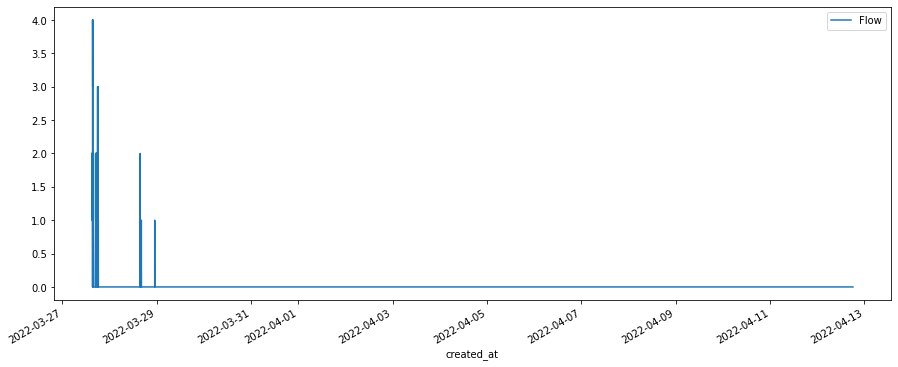

In [169]:
df.plot(figsize=(15,6))
plt.show()

In [170]:
from statsmodels.tsa.stattools import adfuller

In [172]:
test_result=adfuller(df['Flow'])

In [173]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	Flow):
    result=adfuller(	Flow)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [175]:
adfuller_test(df['Flow'])

ADF Test Statistic : -22.56995259277493
p-value : 0.0
#Lags Used : 60
Number of Observations Used : 60108
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [177]:
df['PHFirst Difference'] = df['Flow'] - df['Flow'].shift(1)

In [180]:
df['Flow'].shift(1)

created_at
2022-03-27 15:07:07+00:00    NaN
2022-03-27 15:07:34+00:00    2.0
2022-03-27 15:07:53+00:00    1.0
2022-03-27 15:08:24+00:00    1.0
2022-03-27 15:08:40+00:00    1.0
                            ... 
2022-04-12 18:10:02+00:00    0.0
2022-04-12 18:10:18+00:00    0.0
2022-04-12 18:10:34+00:00    0.0
2022-04-12 18:10:50+00:00    0.0
2022-04-12 18:11:06+00:00    0.0
Name: Flow, Length: 60169, dtype: float64

In [181]:
df['Seasonal First Difference']=df['Flow']-df['Flow'].shift(12)

In [182]:
df.head(14)

,Flow,PHFirst Difference,Seasonal First Difference
created_at,,,
2022-03-27 15:07:07+00:00,2,NaN,NaN
2022-03-27 15:07:34+00:00,1,-1.0,NaN
2022-03-27 15:07:53+00:00,1,0.0,NaN
2022-03-27 15:08:24+00:00,1,0.0,NaN
2022-03-27 15:08:40+00:00,2,1.0,NaN
2022-03-27 15:21:48+00:00,2,0.0,NaN
2022-03-27 15:22:26+00:00,2,0.0,NaN
2022-03-27 15:22:41+00:00,1,-1.0,NaN
2022-03-27 15:23:09+00:00,0,-1.0,NaN


In [183]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -44.114847441004876
p-value : 0.0
#Lags Used : 60
Number of Observations Used : 60096
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


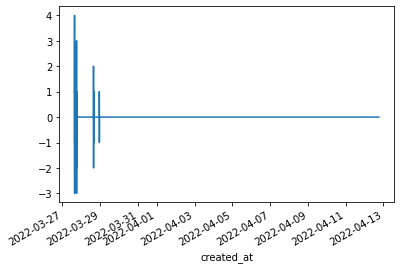

In [184]:
df['Seasonal First Difference'].plot()

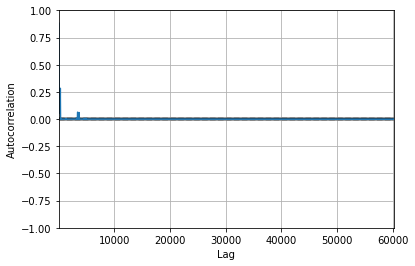

In [186]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Flow'])
plt.show()

In [187]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

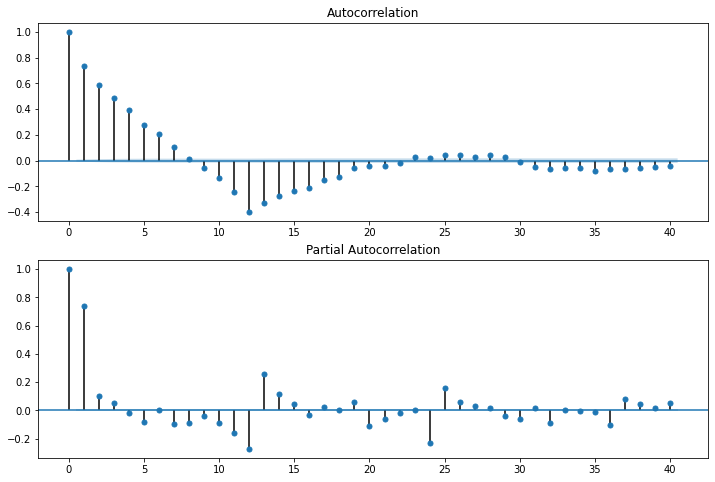

In [188]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [189]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [190]:
model=ARIMA(df['Flow'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [191]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Flow   No. Observations:                60168
Model:                 ARIMA(1, 1, 1)   Log Likelihood              105551.748
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 11 May 2022   AIC                        -211095.497
Time:                        21:24:43   BIC                        -211059.477
Sample:                             1   HQIC                       -211084.310
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.668e-05   8.78e-05     -0.304      0.761      -0.000       0.000
ar.L1.D.Flow     0.1991      0.011     18.001      0.000       0.177       0.221
ma.L1.D.Flow    -0.5883      0.009    -62.244      0.000      -0.607      -0.570
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.0219           +0.0000j            5.0219            0.0000
MA.1            1.6999           +0.0000j            1.6999            0.0000
-----------------------------------------------------------------------------
"""

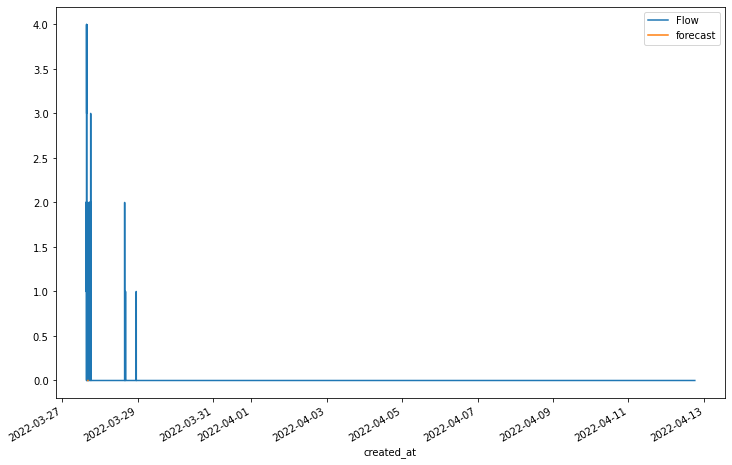

In [193]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Flow','forecast']].plot(figsize=(12,8))

In [194]:
import statsmodels.api as sm

In [195]:
model=sm.tsa.statespace.SARIMAX(df['Flow'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


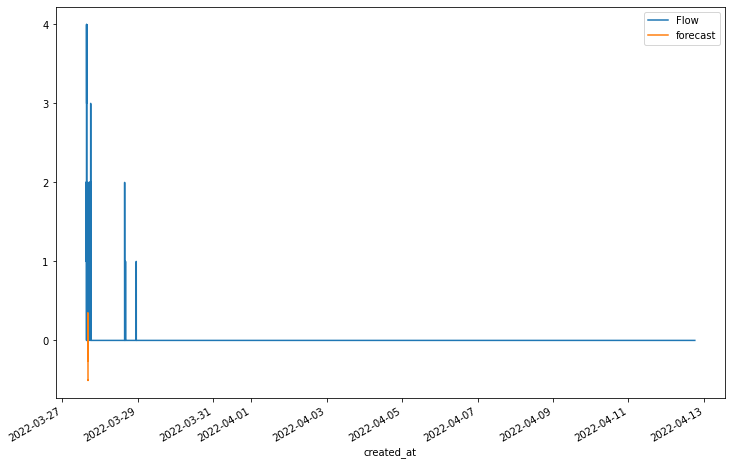

In [196]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Flow','forecast']].plot(figsize=(12,8))

In [197]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [198]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [199]:
future_datest_df.tail()

,Flow,PHFirst Difference,Seasonal First Difference,forecast
2023-11-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2023-12-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-01-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-02-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-03-12 18:11:06+00:00,NaN,NaN,NaN,NaN


In [200]:
future_df=pd.concat([df,future_datest_df])

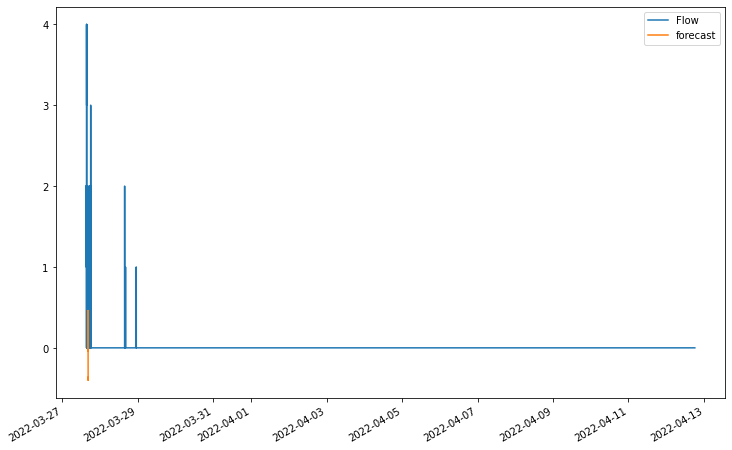

In [202]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Flow', 'forecast']].plot(figsize=(12, 8)) 